<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/05_05_DMD_Cylinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DMD Cylinder**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH07/CH07_SEC02_DMD_Cylinder.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import requests
import io as pyio
from scipy import io

In [2]:
# Local path where you want to store the file
local_file_path = 'VORTALL.mat'

# URL of the .mat file
url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/VORTALL.mat'

# Check if the file already exists
if not os.path.exists(local_file_path):
    # Download the .mat file
    print("Downloading the file...")
    r = requests.get(url)
    if r.status_code == 200:
        # If download is successful, save the file locally
        with open(local_file_path, 'wb') as f:
            f.write(r.content)
        print("Download completed successfully.")
    else:
        print("Failed to retrieve the data. HTTP Status Code: {}".format(r.status_code))
else:
    print("File already exists.")

# Load the .mat file
vortall_mat = io.loadmat(local_file_path)
X = vortall_mat['VORTALL']
# Now X contains the VORTALL data


File already exists.


In [3]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [4]:
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],21)

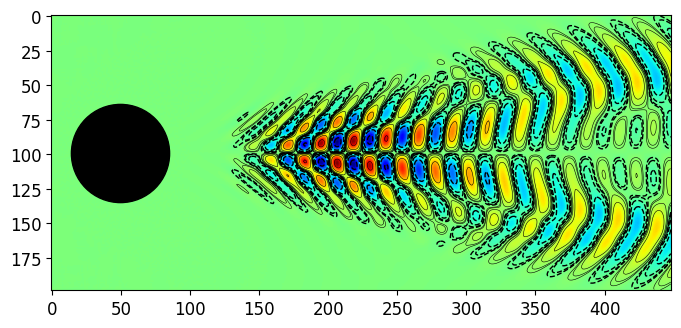

In [5]:
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 16]

## Plot Mode 2
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,1],(449,199))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(49,99,5000,color='k') # draw cylinder


plt.show()

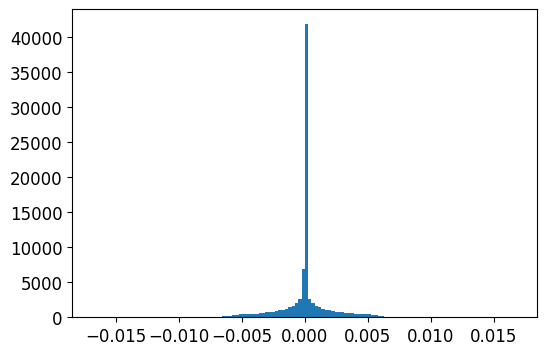

In [6]:
plt.rcParams['figure.figsize'] = [6, 4]

V2 = np.real(np.reshape(Phi[:,1],(199,449)))

# plt.hist(np.real(Phi).reshape(-1),128)
plt.hist(V2.reshape(-1),128)
plt.show()